# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


==> ENTER YOUR RESPONSES HERE

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for data preprocessing
import sklearn.preprocessing

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("../datasets/tiktok_dataset_without_outlier.csv", index_col=0).reset_index(drop=True) # no outliers + removed rows with missing values
raw_data = pd.read_csv("../datasets/tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In [3]:
raw_data

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [4]:
data

,claim_status,verified_status,author_ban_status,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,not verified,under review,59,97,343296.0,19425.0,241.0,1.0,0.0
1,claim,not verified,active,32,107,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,not verified,active,31,137,902185.0,97690.0,2858.0,833.0,329.0
3,claim,not verified,active,25,131,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,not verified,active,19,128,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...
17816,opinion,not verified,active,49,65,6067.0,423.0,81.0,8.0,2.0
17817,opinion,not verified,active,23,66,2973.0,820.0,70.0,3.0,0.0
17818,opinion,not verified,active,50,53,734.0,102.0,7.0,2.0,1.0
17819,opinion,not verified,active,8,80,3394.0,655.0,123.0,11.0,4.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17821 entries, 0 to 17820
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_status          17821 non-null  object 
 1   verified_status       17821 non-null  object 
 2   author_ban_status     17821 non-null  object 
 3   video_duration_sec    17821 non-null  int64  
 4   text_length           17821 non-null  int64  
 5   video_view_count      17821 non-null  float64
 6   video_like_count      17821 non-null  float64
 7   video_share_count     17821 non-null  float64
 8   video_download_count  17821 non-null  float64
 9   video_comment_count   17821 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.4+ MB


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Check for and handle duplicates.

In [7]:
data.duplicated().sum()

0

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

In [8]:
X = data.drop(columns=["claim_status"])
y = data[["claim_status"]]

In [9]:
X

,verified_status,author_ban_status,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,not verified,under review,59,97,343296.0,19425.0,241.0,1.0,0.0
1,not verified,active,32,107,140877.0,77355.0,19034.0,1161.0,684.0
2,not verified,active,31,137,902185.0,97690.0,2858.0,833.0,329.0
3,not verified,active,25,131,437506.0,239954.0,34812.0,1234.0,584.0
4,not verified,active,19,128,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...
17816,not verified,active,49,65,6067.0,423.0,81.0,8.0,2.0
17817,not verified,active,23,66,2973.0,820.0,70.0,3.0,0.0
17818,not verified,active,50,53,734.0,102.0,7.0,2.0,1.0
17819,not verified,active,8,80,3394.0,655.0,123.0,11.0,4.0


In [10]:
y

,claim_status
0,claim
1,claim
2,claim
3,claim
4,claim
...,...
17816,opinion
17817,opinion
17818,opinion
17819,opinion


Check class balance.

In [11]:
y.value_counts()

claim_status
opinion         9446
claim           8375
Name: count, dtype: int64

In [12]:
data.groupby(["claim_status"]).mean(numeric_only=True)

,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
claim_status,,,,,,,
claim,32.427343,94.77206,458702.667701,129797.891224,24268.811343,1479.445134,465.320716
opinion,32.365763,82.47491,4956.003917,1091.875926,217.052191,13.670231,2.696485


One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

### **Task 3. Feature engineering**

Select the outcome variable.

In [13]:
# Select outcome variable
### YOUR CODE HERE ###


**Feature selection and transformation**

Encode target and catgorical variables.

In [14]:
X

,verified_status,author_ban_status,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,not verified,under review,59,97,343296.0,19425.0,241.0,1.0,0.0
1,not verified,active,32,107,140877.0,77355.0,19034.0,1161.0,684.0
2,not verified,active,31,137,902185.0,97690.0,2858.0,833.0,329.0
3,not verified,active,25,131,437506.0,239954.0,34812.0,1234.0,584.0
4,not verified,active,19,128,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...
17816,not verified,active,49,65,6067.0,423.0,81.0,8.0,2.0
17817,not verified,active,23,66,2973.0,820.0,70.0,3.0,0.0
17818,not verified,active,50,53,734.0,102.0,7.0,2.0,1.0
17819,not verified,active,8,80,3394.0,655.0,123.0,11.0,4.0


In [15]:
pd.get_dummies(X,drop_first=True).astype(float)

,video_duration_sec,text_length,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59.0,97.0,343296.0,19425.0,241.0,1.0,0.0,0.0,0.0,1.0
1,32.0,107.0,140877.0,77355.0,19034.0,1161.0,684.0,0.0,0.0,0.0
2,31.0,137.0,902185.0,97690.0,2858.0,833.0,329.0,0.0,0.0,0.0
3,25.0,131.0,437506.0,239954.0,34812.0,1234.0,584.0,0.0,0.0,0.0
4,19.0,128.0,56167.0,34987.0,4110.0,547.0,152.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17816,49.0,65.0,6067.0,423.0,81.0,8.0,2.0,0.0,0.0,0.0
17817,23.0,66.0,2973.0,820.0,70.0,3.0,0.0,0.0,0.0,0.0
17818,50.0,53.0,734.0,102.0,7.0,2.0,1.0,0.0,0.0,0.0
17819,8.0,80.0,3394.0,655.0,123.0,11.0,4.0,0.0,0.0,0.0


In [16]:
y

,claim_status
0,claim
1,claim
2,claim
3,claim
4,claim
...,...
17816,opinion
17817,opinion
17818,opinion
17819,opinion


In [17]:
pd.get_dummies(y,drop_first=True).astype(float)

,claim_status_opinion
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17816,1.0
17817,1.0
17818,1.0
17819,1.0


In [18]:
X = pd.get_dummies(X,drop_first=True).astype(float)
y =pd.get_dummies(y,drop_first=True).astype(float)

### **Task 4. Split the data**


In [19]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [20]:
X_train.shape , X_val.shape, y_train.shape, y_val.shape, X_test.shape, y_test.shape

((10692, 10), (3564, 10), (10692, 1), (3564, 1), (3565, 10), (3565, 1))

### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [21]:
# Instantiate the random forest classifier
rf_clf = RandomForestClassifier()

hyperparams = {"n_estimators":[100,200],
               'max_depth' : [20,40,60],        
              'min_samples_leaf' : [1,2], 
              'min_samples_split' : [2,4],
              'max_features' : ["sqrt",None], 
              'max_samples' : [.5,.7]}


# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf_clf,hyperparams, scoring=scoring, cv=5, refit="recall")

In [22]:
np.array(y_train).reshape(-1)

array([1., 1., 1., ..., 1., 1., 0.])

In [23]:
X_train.shape, y_train.shape

((10692, 10), (10692, 1))

In [24]:
%%time

gs_cv.fit(X_train, np.array(y_train).reshape(-1))

CPU times: total: 12min 22s
Wall time: 12min 39s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 40, 60],
                         'max_features': ['sqrt', None],
                         'max_samples': [0.5, 0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [44]:
rf_cv.best_score_

0.9998245614035088

In [61]:
rf_cv

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 40, 60],
                         'max_features': ['sqrt', None],
                         'max_samples': [0.5, 0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [43]:
rf_cv.best_params_

{'max_depth': 40,
 'max_features': None,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [72]:
import json

with open("best_params_rf_cv.json","w") as file:
  json.dump(rf_cv.best_params_, file)

In [64]:
pd.set_option("display.max_columns",None)

In [ ]:
cv_results = pd.DataFrame(rf_cv.cv_results_)
cv_results

In [ ]:
cv_results['mean_test_score']

In [66]:
cv_results[cv_results["params"] == rf_cv.best_params_]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
58,1.67652,0.150761,0.01971,0.000751,40,None,0.7,1,4,100,"{'max_depth': 40, 'max_features': None, 'max_s...",0.996727,0.995325,0.992984,0.995323,0.997194,0.995511,0.001467,1,0.993897,0.991304,0.987013,0.99216,0.994764,0.991828,0.002701,3,1.0,1.0,1.0,0.999123,1.0,0.999825,0.000351,1,0.996939,0.995633,0.993464,0.995629,0.997375,0.995808,0.001363,1


In [52]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_max_samples',
       'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_accuracy',
       'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy',
       'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy',
       'rank_test_accuracy', 'split0_test_precision', 'split1_test_precision',
       'split2_test_precision', 'split3_test_precision',
       'split4_test_precision', 'mean_test_precision', 'std_test_precision',
       'rank_test_precision', 'split0_test_recall', 'split1_test_recall',
       'split2_test_recall', 'split3_test_recall', 'split4_test_recall',
       'mean_test_recall', 'std_test_recall', 'rank_test_recall',
       'split0_test_f1', 'split1_test_f1', 'split2_test_f1', 'split3_test_f1',
       'split4_test_f1', 'mean_test_f1', 'std_test_f1', 'rank_test_f1'],


**Question:** How well is your model performing? Consider average recall score and precision score.

### **Build an XGBoost model**

In [74]:
# Instantiate the XGBoost classifier
xgb_clf = xgboost.XGBClassifier()

# Create a dictionary of hyperparameters to tune
hyperparams_xgb = {'max_depth': [4,8,12],
                   'min_child_weight': [3, 5],
                   'learning_rate': [0.01, 0.1, 0.2],
                   'n_estimators': [200, 350, 500]
                  }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb_clf,hyperparams_xgb, scoring=scoring, cv=5, refit="recall")


In [77]:
X_train.shape, y_train.shape

((10692, 10), (10692, 1))

In [80]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [4, 8, 12], 'min_child_weight': [3, 5],
                         'n_estimators': [200, 350, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [81]:
xgb_cv.best_score_

1.0

In [82]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 200}

In [91]:
pd.DataFrame(xgb_cv.cv_results_)[["mean_test_precision"]].max()

mean_test_precision    0.990597
dtype: float64

In [93]:
cv_resultsXG = pd.DataFrame(xgb_cv.cv_results_)

In [94]:
cv_resultsXG[cv_resultsXG["params"] == xgb_cv.best_params_]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
3,0.118326,0.021687,0.020802,0.001327,0.01,4,5,200,"{'learning_rate': 0.01, 'max_depth': 4, 'min_c...",0.994857,0.992987,0.992516,0.994855,0.995323,0.994108,0.00113,12,0.990443,0.987013,0.986159,0.990443,0.991304,0.989073,0.002072,52,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0.995199,0.993464,0.993031,0.995199,0.995633,0.994505,0.001048,12


**Question:** How well does your model perform? Consider recall score and precision score.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [99]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
ypredVal = rf_cv.best_estimator_.predict(X_val)
ypredVal

array([1., 0., 0., ..., 0., 1., 1.])

Display the true labels of the testing set.

In [100]:
y_val

,claim_status_opinion
15460,1.0
5760,0.0
7833,0.0
12773,1.0
2948,0.0
...,...
15333,1.0
13309,1.0
2013,0.0
11102,1.0


Create a confusion matrix to visualize the results of the classification model.

In [35]:
#Evaluate XGBoost model
### YOUR CODE HERE ###


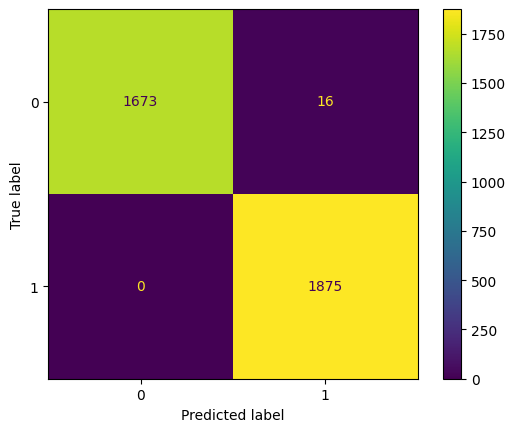

In [101]:
# Compute values for confusion matrix
### YOUR CODE HERE ###

# Create display of confusion matrix
cm0 = metrics.confusion_matrix(y_val,ypredVal)

# Plot confusion matrix
disp0 = metrics.ConfusionMatrixDisplay(cm0)

# Display plot
disp0.plot()


In [114]:
# claims are 0 and opinions are  1
classes = ["claim", "opinion"]

print(metrics.classification_report(y_val,ypredVal,target_names=classes, digits=5))

              precision    recall  f1-score   support

       claim    1.00000   0.99053   0.99524      1689
     opinion    0.99154   1.00000   0.99575      1875

    accuracy                        0.99551      3564
   macro avg    0.99577   0.99526   0.99550      3564
weighted avg    0.99555   0.99551   0.99551      3564



#### **XGBoost**

In [109]:
ypredValXG = xgb_cv.best_estimator_.predict(X_val)
ypredValXG

array([1, 0, 0, ..., 0, 1, 1])

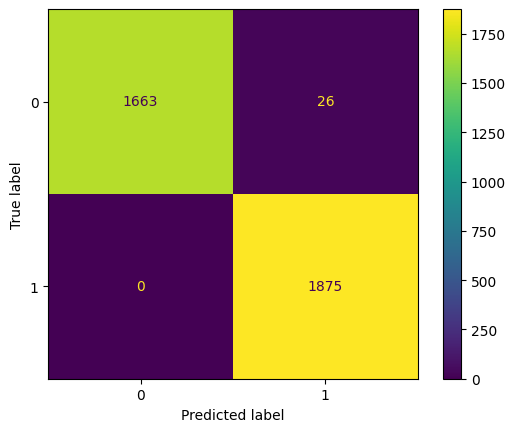

In [110]:
# Compute values for confusion matrix
### YOUR CODE HERE ###

# Create display of confusion matrix
cm1 = metrics.confusion_matrix(y_val,ypredValXG)

# Plot confusion matrix
disp1 = metrics.ConfusionMatrixDisplay(cm1)

# Display plot
disp1.plot()

In [113]:
print(metrics.classification_report(y_val,ypredValXG,target_names=classes, digits=5))

              precision    recall  f1-score   support

       claim    1.00000   0.98461   0.99224      1689
     opinion    0.98632   1.00000   0.99311      1875

    accuracy                        0.99270      3564
   macro avg    0.99316   0.99230   0.99268      3564
weighted avg    0.99280   0.99270   0.99270      3564



In [ ]:
# claims are 0 and opinions are  1
classes = ["claim", "opinion"]

print(metrics.classification_report(y_val,ypredVal,target_names=classes, digits=5))

              precision    recall  f1-score   support

       claim    1.00000   0.99053   0.99524      1689
     opinion    0.99154   1.00000   0.99575      1875

    accuracy                        0.99551      3564
   macro avg    0.99577   0.99526   0.99550      3564
weighted avg    0.99555   0.99551   0.99551      3564



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

### **Use champion model to predict on test data**

In [116]:
"""
XGBoost has a recall of 98.46% of predicting wether a report is a claim and 
RandomForest is slightly better with 99.05% on the validation dataset that is 20% of the entire sample.
"""

'\nXGBoost has a recall of 98.46% of predicting wether a report is a claim and \nRandomForest is slightly better with 99.05% on the validation dataset that is 20% of the entire sample.\n'

In [119]:
final_ypred = rf_cv.best_estimator_.predict(X_test)
final_ypred

array([1., 0., 1., ..., 1., 0., 0.])

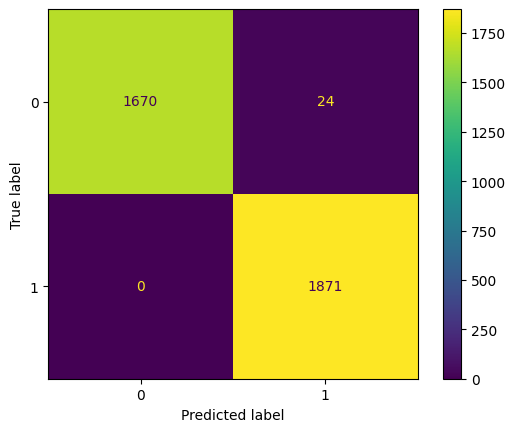

In [125]:
# Compute values for confusion matrix
### YOUR CODE HERE ###

# Create display of confusion matrix
cm2 = metrics.confusion_matrix(y_test,final_ypred)

# Plot confusion matrix
disp2 = metrics.ConfusionMatrixDisplay(cm2)

# Display plot
disp2.plot()

In [141]:
print(metrics.classification_report(y_test,final_ypred,target_names=classes, digits=5))

              precision    recall  f1-score   support

       claim    1.00000   0.98583   0.99287      1694
     opinion    0.98734   1.00000   0.99363      1871

    accuracy                        0.99327      3565
   macro avg    0.99367   0.99292   0.99325      3565
weighted avg    0.99335   0.99327   0.99327      3565



In [121]:
#test on xgb

In [122]:
final_ypred2 = xgb_cv.best_estimator_.predict(X_test)
final_ypred2

array([1, 0, 1, ..., 1, 0, 0])

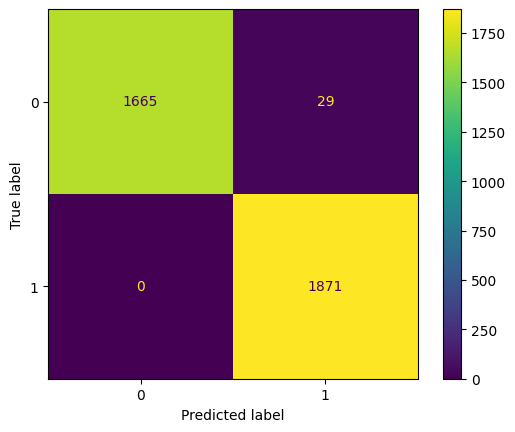

In [124]:
# Compute values for confusion matrix
### YOUR CODE HERE ###

# Create display of confusion matrix
cm3 = metrics.confusion_matrix(y_test,final_ypred2)

# Plot confusion matrix
disp3 = metrics.ConfusionMatrixDisplay(cm3)

# Display plot
disp3.plot()

In [142]:
print(metrics.classification_report(y_test,final_ypred2,target_names=classes, digits=5))

              precision    recall  f1-score   support

       claim    1.00000   0.98288   0.99137      1694
     opinion    0.98474   1.00000   0.99231      1871

    accuracy                        0.99187      3565
   macro avg    0.99237   0.99144   0.99184      3565
weighted avg    0.99199   0.99187   0.99186      3565



#### **Feature importances of champion model**


In [137]:
### YOUR CODE HERE ###
importances = rf_cv.best_estimator_.feature_importances_
importances_list = pd.Series(importances, index=X_test.columns)
importances_list.sort_values(ascending=False)

video_view_count                  0.986801
video_like_count                  0.004192
video_download_count              0.002313
video_share_count                 0.002004
text_length                       0.001531
video_comment_count               0.001440
video_duration_sec                0.001277
author_ban_status_under review    0.000211
author_ban_status_banned          0.000202
verified_status_verified          0.000029
dtype: float64

(0.0, 0.01)

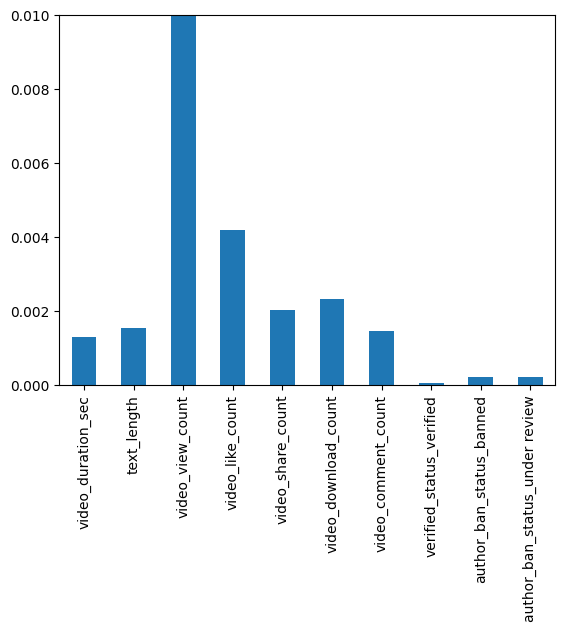

In [146]:
importances_list.plot.bar()
plt.ylim(0, 0.01)

**Question:** Describe your most predictive features. Were your results surprising?

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


==> ENTER YOUR RESPONSES HERE

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.